### 1. Imports

In [1]:
from pprint import pprint

from src.dataset import create_dataloaders
from src.utils import train_pipeline, num_params_stats
from src.models import LSTMSequenceModel, BertSequenceModel, GPT2SequenceModel, MambaSequenceModel, JambaSequenceModel

### 2. Constants

In [2]:
features_list = ["mcc", "day_of_week", "payment_system"] # target feature name should be on index 0 (mcc is target this case)

train_data_path = "data/part_000_0_to_23646.parquet"
val_data_path = "data/part_000_1063620_to_1074462.parquet"
batch_size = 128 
hidden_dim = 128
epochs = 4

### 3. Create dataloaders

In [3]:
dataloader_train, dataloader_val, feature2vocab_size = create_dataloaders(features_list, train_data_path, val_data_path, batch_size=batch_size)
feature2vocab_size


Calculating ids for mcc


  0%|          | 0/22743 [00:00<?, ?it/s]

Resulting vocab size: 112 (out of 112 tokens overall, due to MIN_FREQ=3)

Calculating ids for day_of_week


  0%|          | 0/22743 [00:00<?, ?it/s]

Resulting vocab size: 11 (out of 11 tokens overall, due to MIN_FREQ=3)

Calculating ids for payment_system


  0%|          | 0/22743 [00:00<?, ?it/s]

Resulting vocab size: 10 (out of 10 tokens overall, due to MIN_FREQ=3)


{'mcc': 112, 'day_of_week': 11, 'payment_system': 10}

### 4. Train models

In [4]:
metrics = dict()

#### 4.1 LSTM

In [5]:
num_params_stats(model_class=LSTMSequenceModel, hidden_dim=hidden_dim, feature2vocab_dict=feature2vocab_size)


In total:
  - 163,568 params
  - 163,568 learnable params

 . embeddings:
 .   - 17,024 params
 .   - 17,024 learnable params

 . lstm:
 .   - 132,096 params
 .   - 132,096 learnable params

 . fc:
 .   - 14,448 params
 .   - 14,448 learnable params


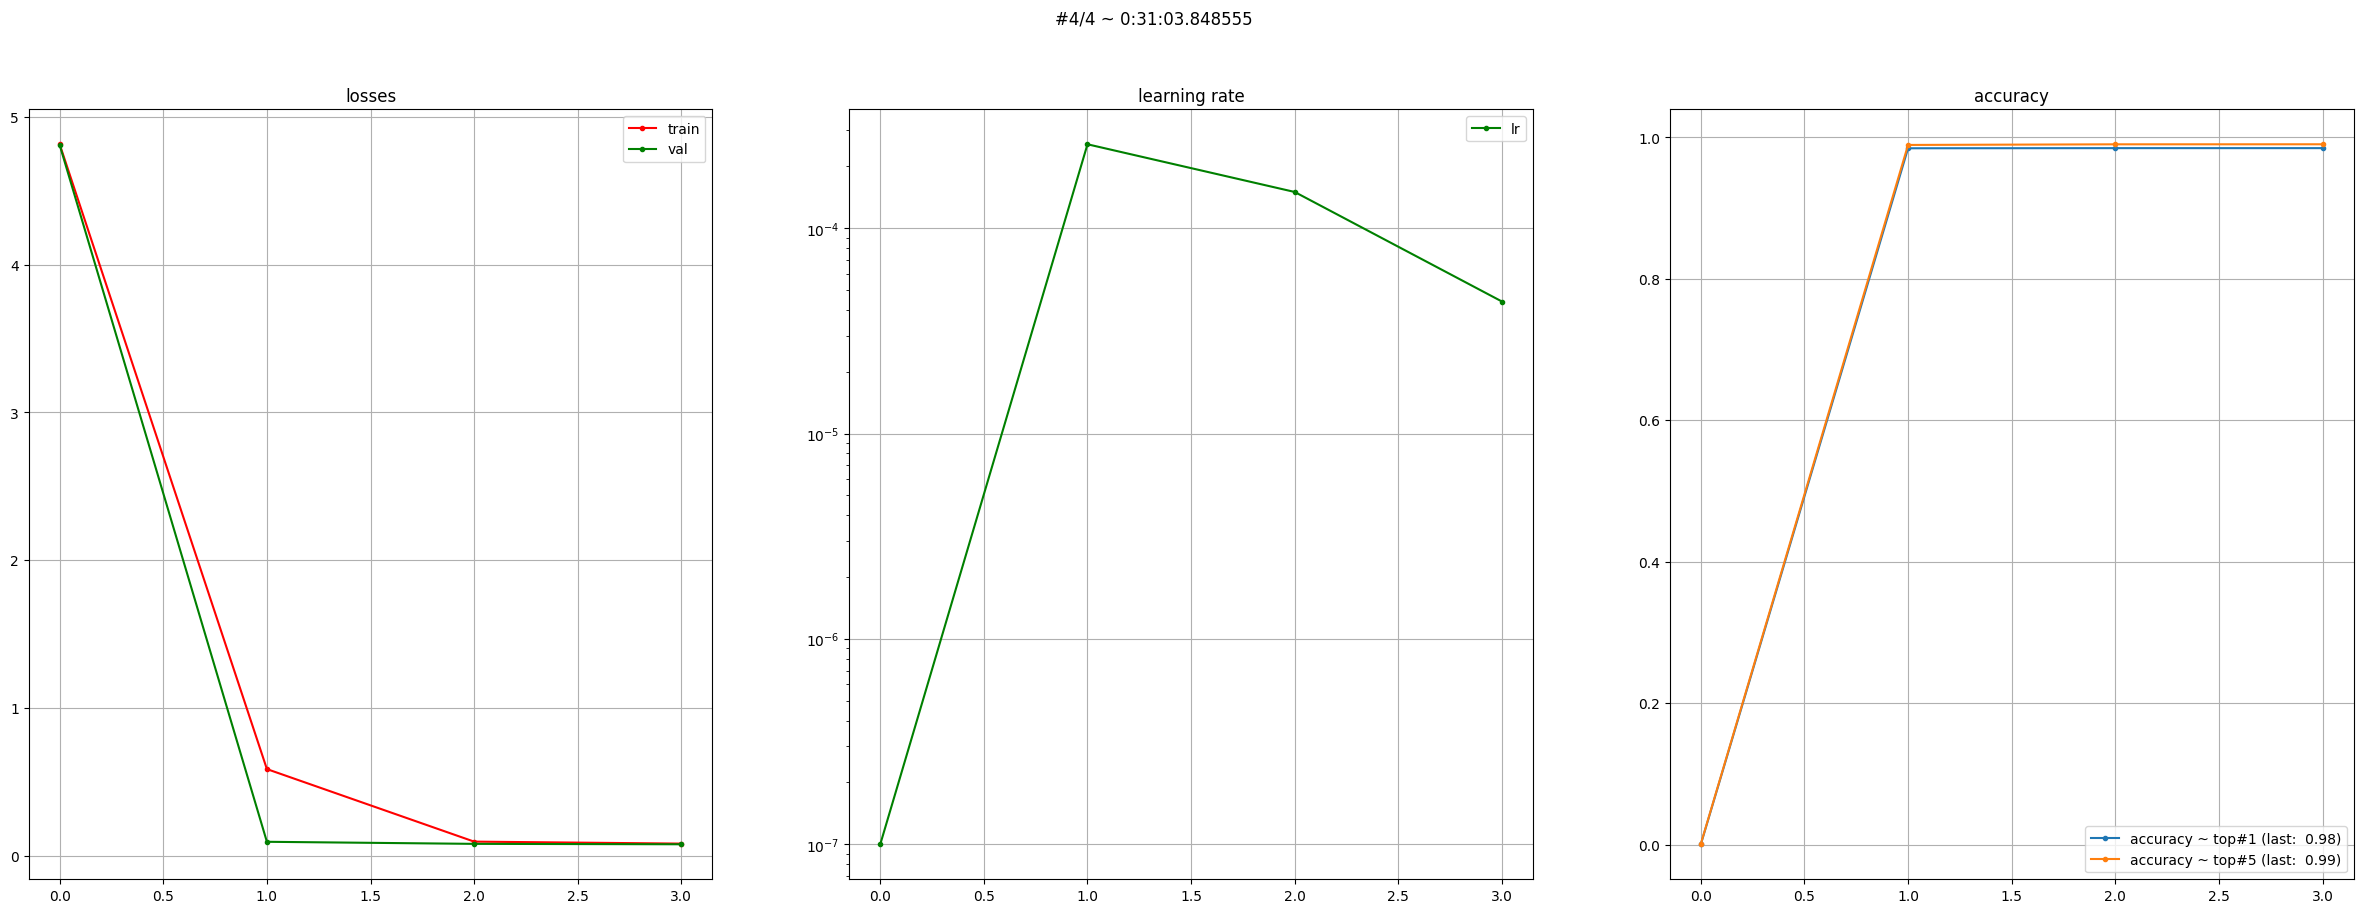

Learning process ended with early stop after epoch 4
defaultdict(<class 'list'>,
            { 'accuracy ~ top#1': [ 0.00034986778364398436,
                                    0.9846771173207054,
                                    0.9848747645632961,
                                    0.9848760397982115],
              'accuracy ~ top#5': [ 0.0010003509446486836,
                                    0.989382252402656,
                                    0.9902667553398902,
                                    0.9903277965845015]})


In [7]:
metrics["lstm"] = train_pipeline(
    model_class=LSTMSequenceModel, 
    model_name="lstm", 
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val, 
    feature2vocab_size=feature2vocab_size, 
    hidden_dim=hidden_dim, 
    epochs=epochs
)
pprint(metrics["lstm"], indent=2)

#### 4.2 Masked bert 

In [8]:
num_params_stats(model_class=BertSequenceModel, hidden_dim=hidden_dim, feature2vocab_dict=feature2vocab_size)  


In total:
  - 7,445,616 params
  - 7,445,616 learnable params

 . bert:
 .   - 7,414,144 params
 .   - 7,414,144 learnable params

 . embeddings:
 .   - 17,024 params
 .   - 17,024 learnable params

 . output_layer:
 .   - 14,448 params
 .   - 14,448 learnable params


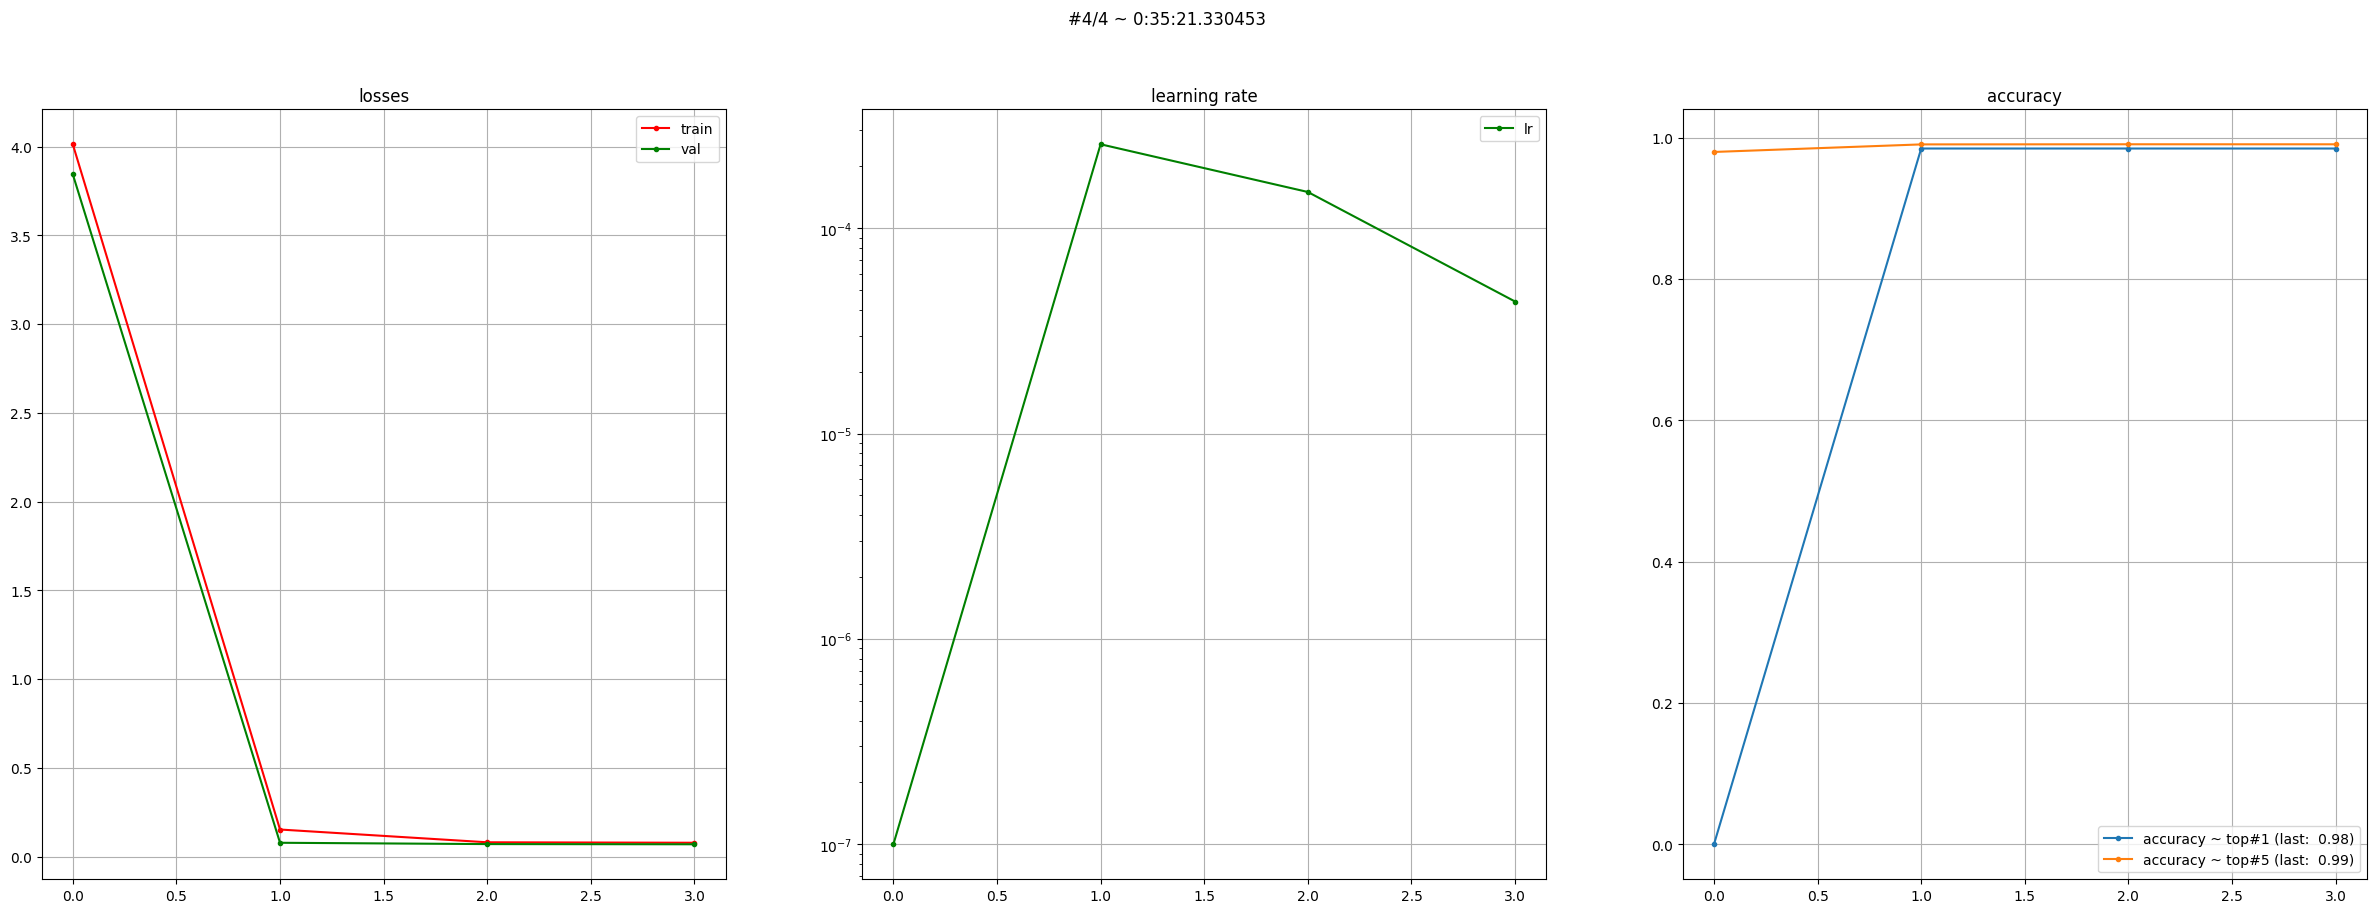

Learning process ended with early stop after epoch 4
defaultdict(<class 'list'>,
            { 'accuracy ~ top#1': [ 7.437453411417761e-05,
                                    0.9849971729458856,
                                    0.9849958693724167,
                                    0.9849956851718178],
              'accuracy ~ top#5': [ 0.9801211705545652,
                                    0.9908208307413003,
                                    0.9909912729723651,
                                    0.9909503521008616]})


In [9]:
metrics["bert"] = train_pipeline(
    model_class=BertSequenceModel, 
    model_name="bert", 
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val, 
    feature2vocab_size=feature2vocab_size, 
    hidden_dim=hidden_dim, 
    epochs=epochs
)
pprint(metrics["bert"], indent=2)

#### 4.3 GPT2

In [10]:
num_params_stats(model_class=GPT2SequenceModel, hidden_dim=hidden_dim, feature2vocab_dict=feature2vocab_size)


In total:
  - 7,388,784 params
  - 7,388,784 learnable params

 . embeddings:
 .   - 17,024 params
 .   - 17,024 learnable params

 . gpt2:
 .   - 7,357,312 params
 .   - 7,357,312 learnable params

 . output_layer:
 .   - 14,448 params
 .   - 14,448 learnable params


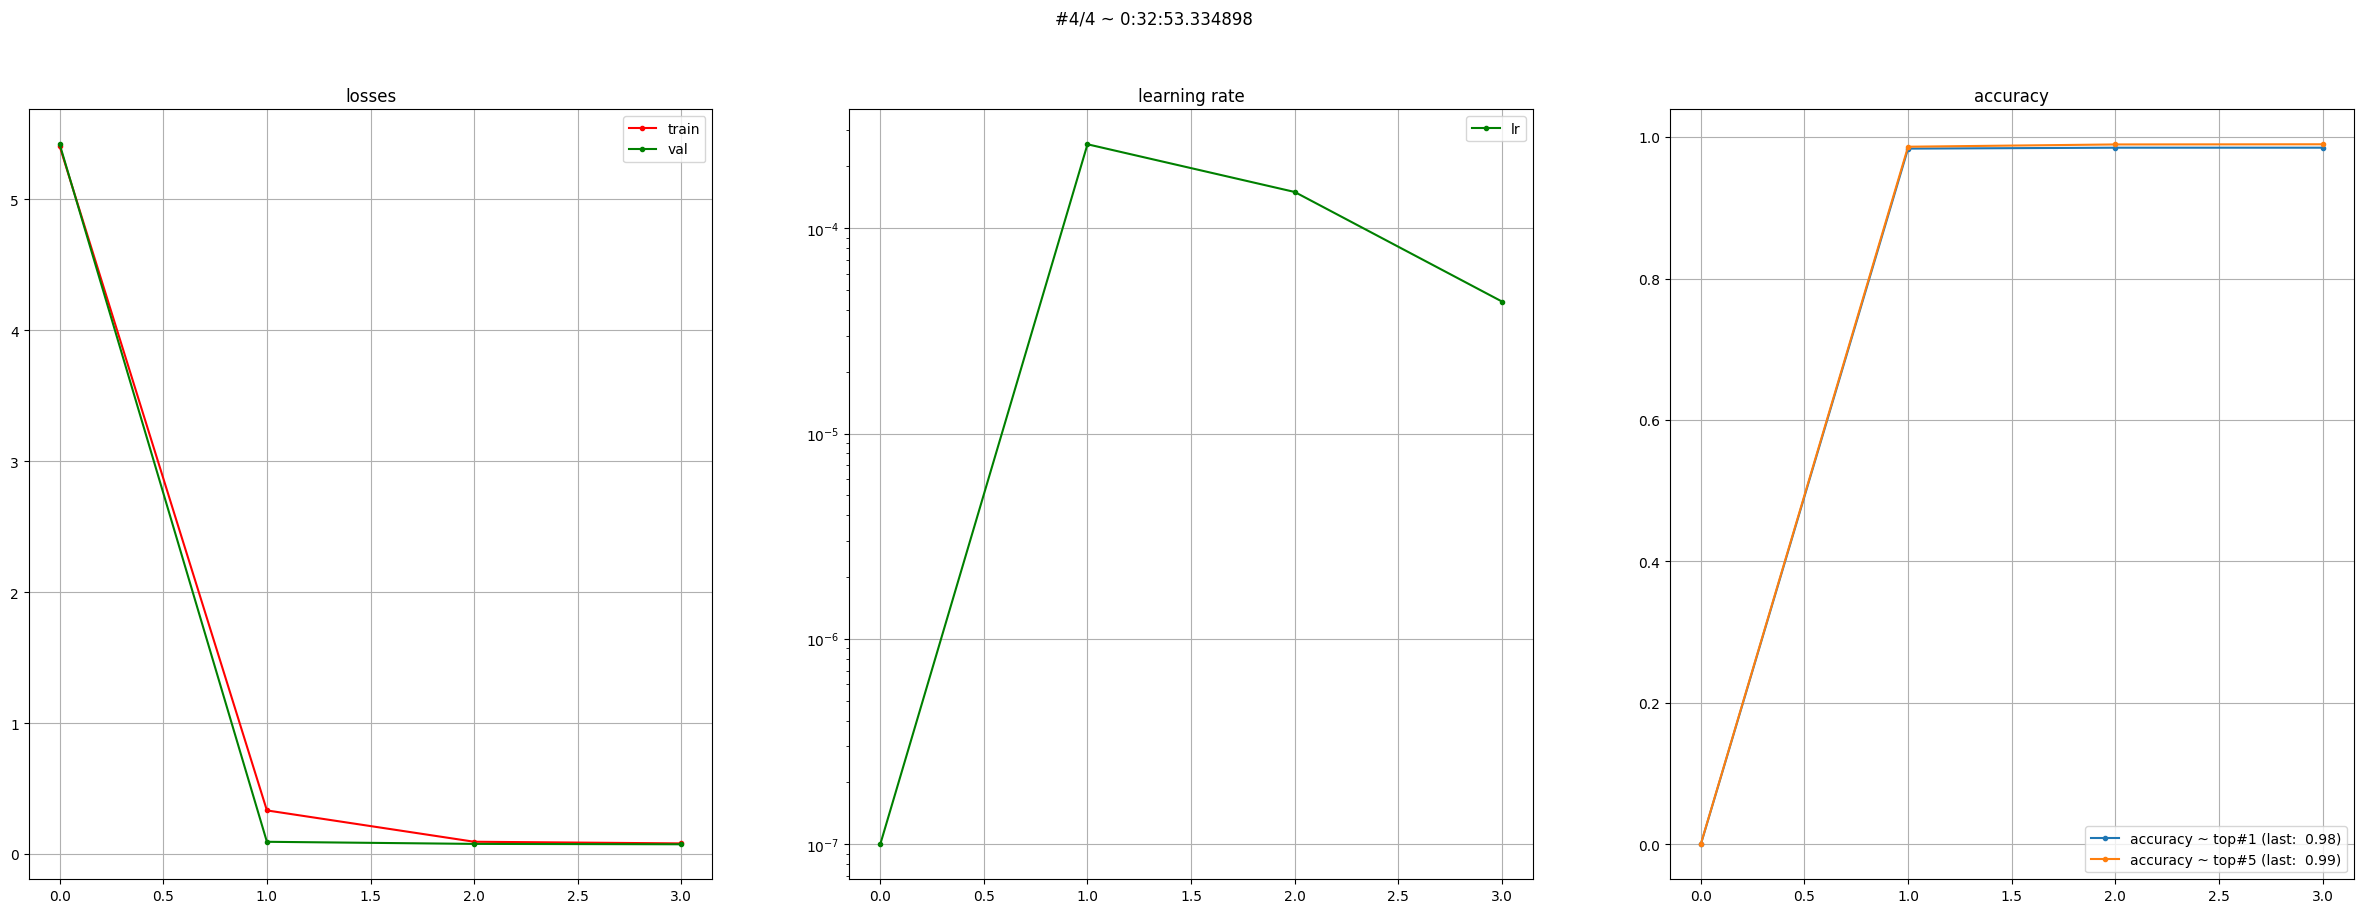

Learning process ended with early stop after epoch 4
defaultdict(<class 'list'>,
            { 'accuracy ~ top#1': [ 0.00011880938627307666,
                                    0.9836502839976494,
                                    0.984937902860879,
                                    0.9849509952726758],
              'accuracy ~ top#5': [ 0.0007039013346778655,
                                    0.9863298642787316,
                                    0.9895420535068168,
                                    0.9897788221227526]})


In [11]:
metrics["gpt2"] = train_pipeline(
    model_class=GPT2SequenceModel, 
    model_name="gpt2", 
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val, 
    feature2vocab_size=feature2vocab_size, 
    hidden_dim=hidden_dim, 
    epochs=epochs
)
pprint(metrics["gpt2"], indent=2)

#### 4.4 Mamba

In [18]:
num_params_stats(model_class=MambaSequenceModel, hidden_dim=hidden_dim, feature2vocab_dict=feature2vocab_size)


In total:
  - 6,909,296 params
  - 6,909,296 learnable params

 . embeddings:
 .   - 17,024 params
 .   - 17,024 learnable params

 . mamba:
 .   - 6,877,824 params
 .   - 6,877,824 learnable params

 . output_layer:
 .   - 14,448 params
 .   - 14,448 learnable params


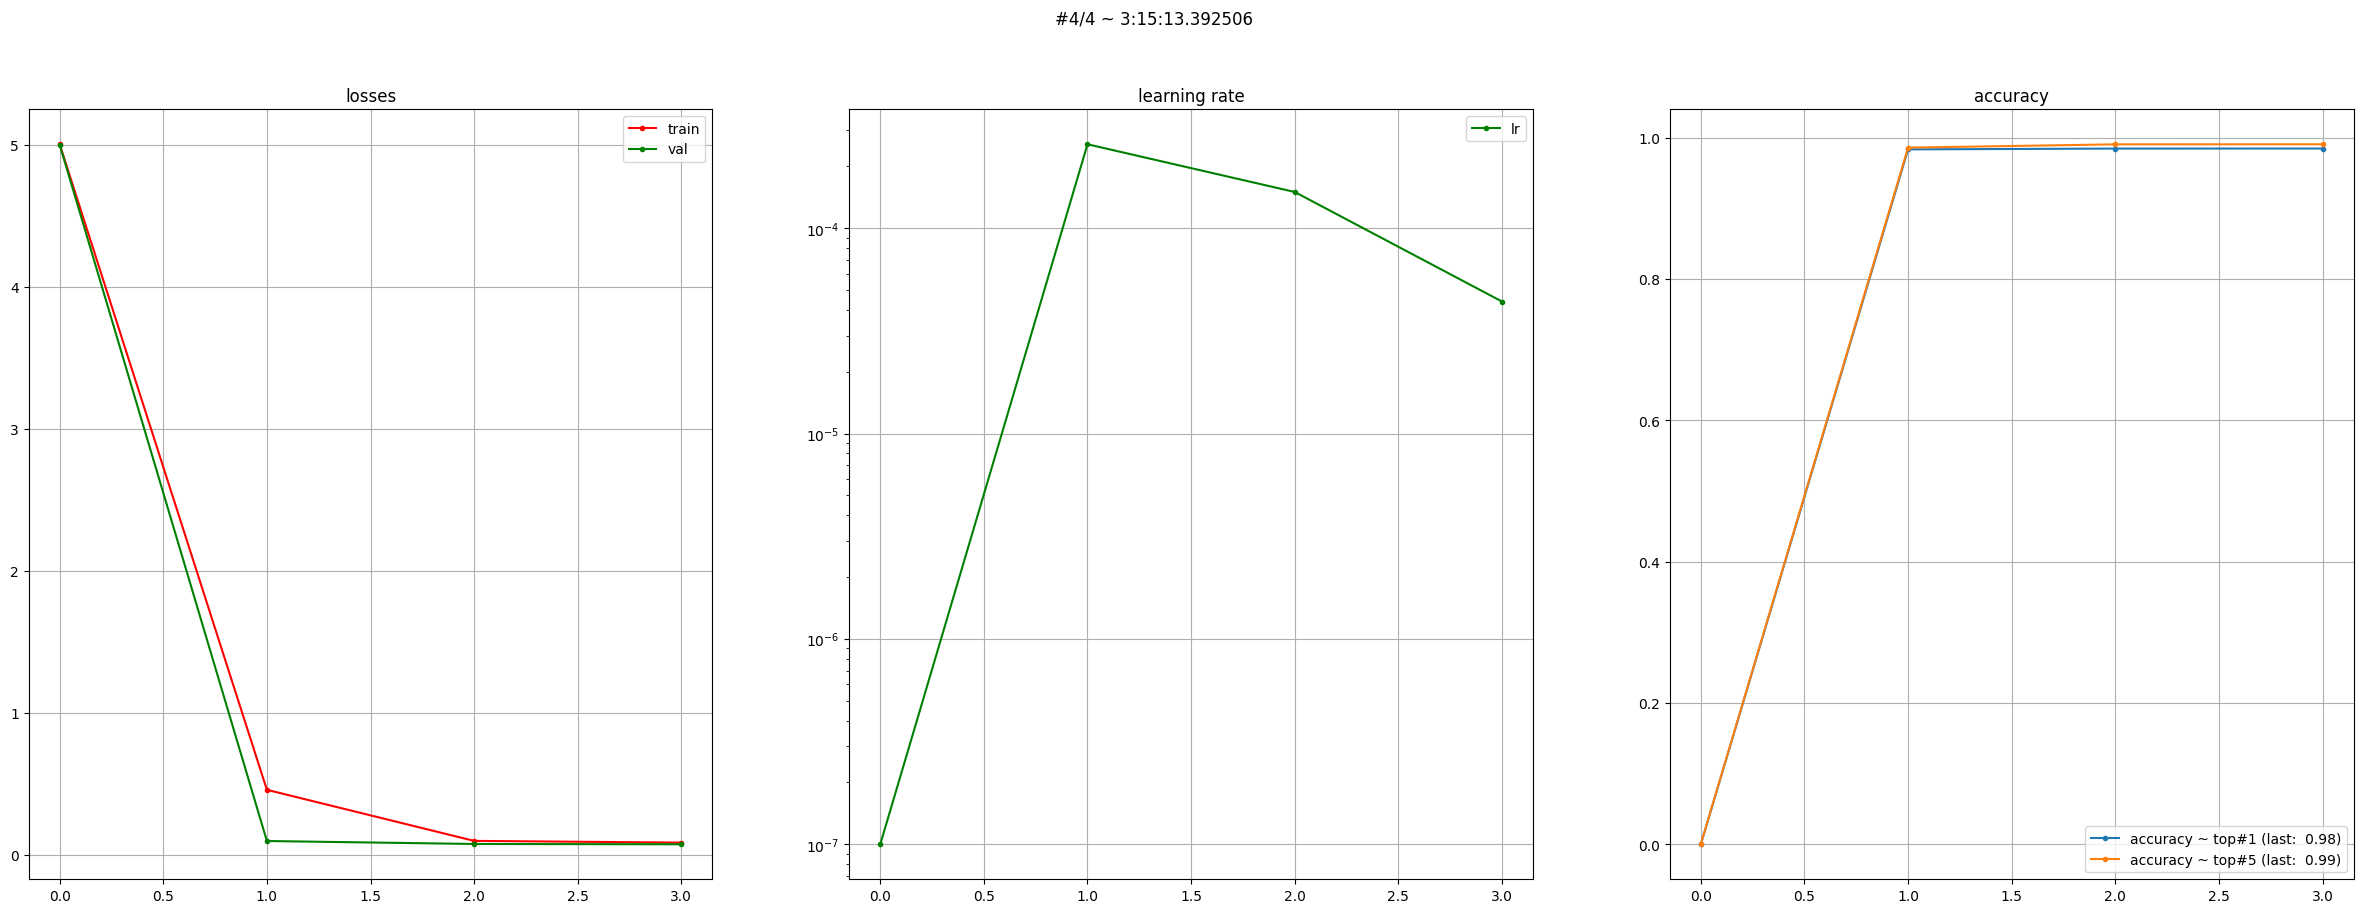

Learning process ended with early stop after epoch 4
defaultdict(<class 'list'>,
            { 'accuracy ~ top#1': [ 0.00010272725706378124,
                                    0.9836865573463506,
                                    0.9848555793624598,
                                    0.9848876160973866],
              'accuracy ~ top#5': [ 0.0007040430274462292,
                                    0.9861651180969551,
                                    0.9908249114930291,
                                    0.9909178761183527]})


In [19]:
metrics["mamba"] = train_pipeline(
    model_class=MambaSequenceModel, 
    model_name="mamba", 
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val, 
    feature2vocab_size=feature2vocab_size, 
    hidden_dim=hidden_dim, 
    epochs=epochs
)
pprint(metrics["mamba"], indent=2)

#### 4.5 Jamba

In [29]:
num_params_stats(model_class=JambaSequenceModel, hidden_dim=hidden_dim, feature2vocab_dict=feature2vocab_size)


In total:
  - 9,871,376 params
  - 9,871,376 learnable params

 . embeddings:
 .   - 17,024 params
 .   - 17,024 learnable params

 . jamba:
 .   - 9,839,904 params
 .   - 9,839,904 learnable params

 . output_layer:
 .   - 14,448 params
 .   - 14,448 learnable params


In [ ]:
metrics["jamba"] = train_pipeline(
    model_class=JambaSequenceModel, 
    model_name="jamba", 
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val, 
    feature2vocab_size=feature2vocab_size, 
    hidden_dim=hidden_dim, 
    epochs=epochs
)
pprint(metrics["jamba"], indent=2)

#1/4:


 93%|█████████▎| 164/177 [1:14:37<05:55, 27.31s/it]

### 5.Final results

In [5]:
import os
import torch
import torch.nn as nn
from src.utils import val, get_device, create_model_and_optimizer

def revalidate(model_name, model_class):
    model_name = f"{model_name}#0"
    checkpoint = torch.load(os.path.join("./chkp", f"{model_name}.pt"), map_location='cpu')
    device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
    model, optimizer = create_model_and_optimizer(
        model_class=model_class, 
        model_params=dict(hidden_dim=128, feature2vocab_dict=feature2vocab_size),
        lr=3e-4,
    )
    # Загружаем состояния из чекпоинта
    model.load_state_dict(checkpoint['model_state_dict'])
    epoch = checkpoint['epoch']
    losses = checkpoint['losses']
    criterion = nn.CrossEntropyLoss()
    loss, metrics_ = val(model, dataloader_val, criterion, metric_names={"accuracy": {"top": [1, 5], "plot_id": 1}, 
                                                                         "precision_score": {},
                                                                         "recall_score": {},
                                                                         "f1_score": {}}, device=get_device())
    return metrics_


In [7]:
import warnings
warnings.filterwarnings("ignore")

metrics = dict()

for model_name, model_class in [("lstm", LSTMSequenceModel), ("bert", BertSequenceModel), ("gpt2", GPT2SequenceModel), ("mamba", MambaSequenceModel), ("jamba", JambaSequenceModel)]:
    metrics[model_name] = revalidate(model_name, model_class)


100%|██████████| 83/83 [08:04<00:00,  5.84s/it]
The fast path is not available because on of `(selective_state_update, selective_scan_fn, causal_conv1d_fn, causal_conv1d_update, mamba_inner_fn)` is None. Falling back to the naive implementation. To install follow https://github.com/state-spaces/mamba/#installation and https://github.com/Dao-AILab/causal-conv1d
100%|██████████| 83/83 [08:17<00:00,  5.99s/it]
The fast path is not available because on of `(selective_state_update, selective_scan_fn, causal_conv1d_fn, causal_conv1d_update, mamba_inner_fn)` is None. To install follow https://github.com/state-spaces/mamba/#installation and https://github.com/Dao-AILab/causal-conv1d. If you want to use the naive implementation, set `use_mamba_kernels=False` in the model config
100%|██████████| 83/83 [08:22<00:00,  6.05s/it]


In [13]:
import pandas as pd

model_names = metrics.keys()
column_names = None
best_metrics = []
for model_name in model_names:
    metric_names = sorted(list(metrics[model_name].keys()))
    row_values = [model_name] 
    column_names = ['model'] + list(metrics[model_name].keys())
    for metric_name in metric_names:
        row_values.append(metrics[model_name][metric_name])
    best_metrics.append(tuple(row_values))

metrics_stats = pd.DataFrame(best_metrics, columns=column_names)
metrics_stats = metrics_stats.sort_values("f1_score", ascending=False).reset_index(drop=True)
metrics_stats.columns = ['model', 'accuracy', 'accuracy@5', 'f1_score', 'precision_score', 'recall_score']
metrics_stats = metrics_stats[['model','f1_score', 'accuracy', 'accuracy@5', 'precision_score', 'recall_score']]
metrics_stats.to_csv("metrics.csv", index=False)

In [14]:
metrics_stats

,model,f1_score,accuracy,accuracy@5,precision_score,recall_score
0,jamba,0.984065,0.985698,0.990778,0.984133,0.985698
1,bert,0.982950,0.984996,0.990950,0.982531,0.984996
2,gpt2,0.982863,0.984951,0.989779,0.982867,0.984951
3,mamba,0.982841,0.984888,0.990918,0.982746,0.984888
4,lstm,0.982704,0.984876,0.990328,0.982399,0.984876
